<h1>CG20_Aula_07_KMeans</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mylib import *

In [2]:
fatia = np.load("secao_do_plug.npy")
show_npy(fatia)

shape=(925, 920), type=uint16
min= 0, max=10184


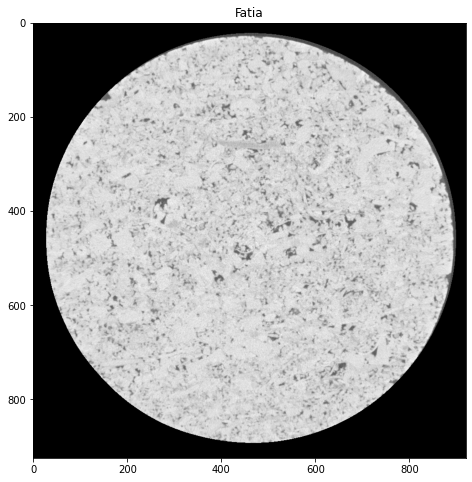

In [3]:
show_gray(fatia,"Fatia")

In [4]:
data = fatia[fatia>0]
data.shape

(596113,)

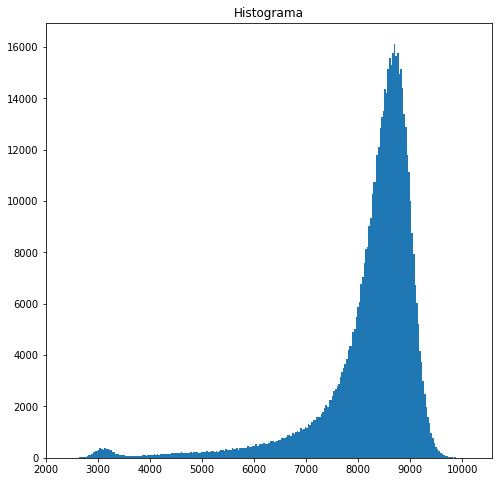

In [5]:
show_hist(data.ravel(),"Histograma")

<h3>Algoritmo de KMeans</h3>
<ol>
    <li>Determine a posição de k representantes</li>
    <li>Agrupe todos os pontos em torno dos seus representantes</li>
    <li>Recalcule a posição dos representantes</li>
    <li>Repita passos 1 e 2 até convergir</li>
 </ol>

In [6]:
def KMeans(k,dados,erro_max,max_iteracoes):
    # inicializacao
    n = dados.size
    valor_min = np.amin(dados)
    valor_max = np.amax(dados)
    delta = (valor_max-valor_min)/k
    c0 = valor_min + 0.5*delta
    centros = np.array([ int(c0+i*delta) for i in range(k)])
    grupos        = np.zeros(n,dtype=np.int)
    distancias    = np.zeros(k,dtype=np.int)
    novos_centros = np.zeros(k,dtype=np.int)
    erro = erro_max + 1
    iteracao = 1
    
    while (iteracao<=max_iteracoes and erro>erro_max):
        print("redistribui")
        
        # reatribui as amostras para os grupos
        for i,v in enumerate(dados):
            distancias = np.abs(centros-v)
            grupos[i]   = np.argmin(distancias)
            
        print("reposiciona")
        # recalcula a posicao dos centros
        for j in range(k):
            novos_centros[j] = np.mean(dados[grupos==j]).astype(int)
            
        erro = np.amax(np.abs(centros - novos_centros))
        centros = novos_centros.copy()
        print(f'iteracao={iteracao}, erro={erro}, centros={centros}')
        iteracao += 1
    return grupos

grupos = KMeans(4, data, 10, 10)

redistribui
reposiciona
iteracao=1, erro=495, centros=[3406 5521 7684 8713]
redistribui
reposiciona
iteracao=2, erro=287, centros=[3485 5808 7709 8701]
redistribui
reposiciona
iteracao=3, erro=180, centros=[3601 5988 7747 8703]
redistribui
reposiciona
iteracao=4, erro=128, centros=[3694 6116 7787 8710]
redistribui
reposiciona
iteracao=5, erro=99, centros=[3771 6215 7826 8719]
redistribui
reposiciona
iteracao=6, erro=76, centros=[3826 6291 7861 8728]
redistribui
reposiciona
iteracao=7, erro=62, centros=[3872 6353 7891 8736]
redistribui
reposiciona
iteracao=8, erro=51, centros=[3910 6404 7917 8744]
redistribui
reposiciona
iteracao=9, erro=43, centros=[3941 6447 7940 8751]
redistribui
reposiciona
iteracao=10, erro=37, centros=[3968 6484 7959 8757]


In [7]:
import matplotlib.patches as mpatches

def get_colored_image(rgb, image):
    return np.dstack((image * rgb[0], image * rgb[1], image * rgb[2])).astype(np.uint8)

def show_img_with_legend(image, show_holes=False, title="", save=False):
    plt.figure(figsize=(8,8))
    if title != "":
        plt.title(title)
    plt.imshow(image, cmap='gray')  
    
    low_legend = mpatches.Patch(color=colors[1]/255, label='Low porosity')
    medium_legend = mpatches.Patch(color=colors[2]/255, label='Medium porosity')
    high_legend = mpatches.Patch(color=colors[3]/255, label='High porosity')
    if show_holes:
        holes_legend = mpatches.Patch(color=colors[0]/255, label='Hollow')
        plt.legend(handles=[low_legend, medium_legend, high_legend, holes_legend], fontsize='small')
    else:
        plt.legend(handles=[low_legend, medium_legend, high_legend], fontsize='small')
        
    if save:
        plt.savefig(my_name)
    plt.show()

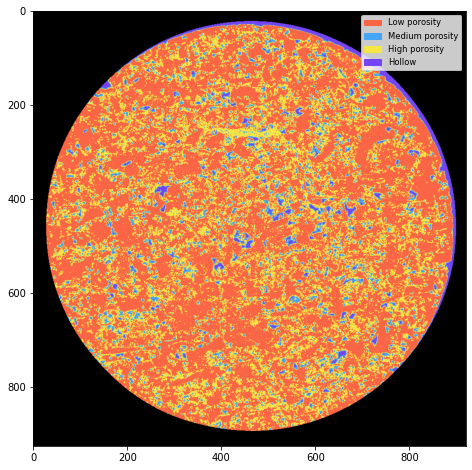

In [13]:
color = [np.zeros(fatia.shape), np.zeros(fatia.shape), np.zeros(fatia.shape), np.zeros(fatia.shape)]
n, m = fatia.shape
colors = np.array([[115, 69, 245], [250, 101, 70], [69, 166, 245], [245, 230, 69]]).astype(np.uint8)

k = 0
for i in range(n):
    for j in range(m):
        if fatia[i, j] != 0:
            color[grupos[k]][i, j] = 1
            k += 1
            
a = get_colored_image(colors[0], color[0])
b = get_colored_image(colors[1], color[3])
c = get_colored_image(colors[2], color[1])
d = get_colored_image(colors[3], color[2])
show_img_with_legend(a+b+c+d, True)